##  <font color = blue> ANZ TASK 2 - Predicting Annual Salary <font color>

Prepared by : TEIK NING YANG

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data


<a id='Table of Content'></a>
#### <font color = blue> Table of Content </font>

1. <a href='#IMPORT LIBRARIES'>IMPORT LIBRARIES</a> : Import useful libraries for this project
2. <a href='#IMPORT DATASETS'>IMPORT DATASETS</a> : Import Datasets
3. <a href='#DATA EXPLORATION AND PREPARATION'>DATA EXPLORATION AND PREPARATION</a> : Data EXPLORATION AND PREPARATION <br>
3.1 - Check distribution of Salary Payout pattern to customer<br>
3.2 - Check distribution of Salary of customer<br>
3.3 - Estimate Annual Salary <br>
3.4 - Analyzing Salary payment time<br>
3.5 - GET CITY OF CUSTOMERS <br>
3.6 - Plot the Scatter Matrix<br>
3.7 - Plot the Correlaton Matrix<br>

4. <a href='#MODELING AND FEATURE SELECTION'>MODELING AND FEATURE SELECTION</a> : MODELING AND FEATURE SELECTION <br>
4.1 - Linear Regression Model <br>
4.2 - Polynominal Regression 2nd Degrees (order) <br>
4.3 - Lasso Regression<br>
4.4 - Feature selection with Lasso <br>
4.5 - Decision Tree Regressor <br>

5. <a href='#MODELING AFTER FEATURE SELECTION'>MODELING AFTER FEATURE SELECTION</a> : MODELING AFTER FEATURE SELECTION <br>
5.1 - Linear Regression Model <br>
5.2 - Polynominal Regression 2nd Degrees (order) <br>
5.3 - RIDGE Regression<br>
5.4 - Decision Tree Regressor <br>

5. <a href='#SUMMARY'>SUMMARY</a> : SUMMARY <br>

<a id='IMPORT LIBRARIES'></a>
###  <h2 align = center> <font color = blue> 1. IMPORT LIBRARIES </font></h2>

<a href='#Table of Content'>Back to Top </a> 

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


<a id='IMPORT DATASETS'></a>
### <font color = blue> 2. IMPORT DATASETS </font>

<a href='#Table of Content'>Back to Top </a> 

In [3]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.describe(include='all')

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,7717.000000,885.0,12043,12043,12043,12043,7717,883.0,12043,...,12043.000000,7717,7717,12043,12043.000000,12043,12043,12043,7717,12043
unique,2,NaN,3.0,100,1,100,6,5725,NaN,80,...,NaN,1609,8,9442,NaN,12043,1,100,2703,2
top,authorized,NaN,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,NaN,Michael,...,NaN,Melbourne,NSW,2018-09-03T11:00:00.000+0000,NaN,6d18ee3d78b54270a99cef4b5ae1cf99,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,NaN,883.0,578,12043,578,3934,14,NaN,746,...,NaN,255,2169,10,NaN,1,12043,578,145,11160
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.802644,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,30.582330,NaN,NaN,NaN,187.933588,NaN,NaN,NaN,NaN,NaN
std,NaN,0.398029,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,10.046343,NaN,NaN,NaN,592.599934,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,18.000000,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,22.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

<a id='DATA EXPLORATION AND PREPARATION'></a>
### <font color = blue> 3. DATA EXPLORATION AND PREPARATION</font>

<a href='#Table of Content'>Back to Top </a>


In [197]:
# Group the data based on unique customer account no., Sum up for Quarterly salary, then multiply by 4
df_S = df1.amount.groupby(df1.account.values).count()
df_S = df_Sal.to_frame(name = 'Pay_Cnt')
df_S['Pay_Var'] = df1.amount.groupby(df1.account.values).var()
df_S['Pay'] = df1.amount.groupby(df1.account.values).median()

#df_S.apply(pd.value_counts().sort_index())
df_S.Pay_Cnt.value_counts().sort_index()

2      4
3      1
4      2
5      1
6     28
7     24
12     5
13    27
14     8
Name: Pay_Cnt, dtype: int64

Text(0, 0.5, 'Frequency')

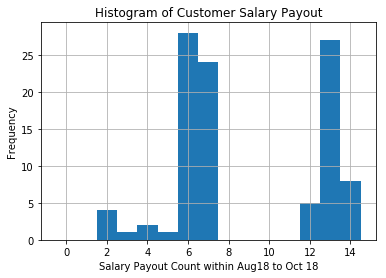

In [208]:
df_S.Pay_Cnt.hist(bins = 15, range = (0,15), align = 'left')
plt.title('Histogram of Customer Salary Payout')
plt.xlabel('Salary Payout Count within Aug18 to Oct 18')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

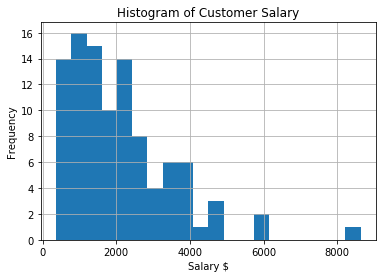

In [207]:
df_S.Pay.hist(bins = 20, align = 'left', xlabelsize=10, xrot=None, ylabelsize=10, yrot=None,)
plt.title('Histogram of Customer Salary')
plt.xlabel('Salary $')
plt.ylabel('Frequency')

##### Estimate the annual salary


Remarks:
We observed that the Pay for each customer is constant.
some of the customer have missing payment within the period, probably before they are casual staffs. 

For simplicity:
Weekly pay   ==> 12-14 pay received in the period <br>
Fortnightly  ==> 6- 7 pay received in the period<br>
Monthly      ==> 2 - 5 pay received in the period<br>
<br>

In [209]:
df_S.head()

,Pay_Cnt,Pay_Var,Pay
ACC-1037050564,13,0.0,892.09
ACC-1056639002,6,0.0,3195.01
ACC-1199531521,7,0.0,3785.78
ACC-1217063613,2,0.0,4863.62
ACC-1222300524,13,0.0,1002.13


In [228]:
df_S['Annual_Sal'] = 0
for i in range(0,len(df_S.Pay_Cnt)):
    if df_S['Pay_Cnt'][i] >=12:
        df_S['Annual_Sal'][i] = df_S['Pay'][i] / 7 *365.25 
    elif df_S['Pay_Cnt'][i] <=5:
        df_S['Annual_Sal'][i] = df_S['Pay'][i] * 12 
    else:
        df_S['Annual_Sal'][i] = df_S['Pay'][i] / 14 *365.25
df_S.head()                        

/Users/teikningyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pay_Cnt,Pay_Var,Pay,Annual_Sal
ACC-1037050564,13,0.0,892.09,46547
ACC-1056639002,6,0.0,3195.01,83355
ACC-1199531521,7,0.0,3785.78,98768
ACC-1217063613,2,0.0,4863.62,58363
ACC-1222300524,13,0.0,1002.13,52289


In [276]:
# obtain other debit transaction and store in previous data frame
for txn in df.txn_description.unique():
    if txn != 'PAY/SALARY':
        df_T = df.loc[df['txn_description'] == txn]
        df_S[txn] = df_T.amount.groupby(df_T.account.values).sum()
df_S.fillna(0, inplace=True)

# feature engineering of TtlSpend attribute
df_S['TtlSpend'] = df_S['POS']+ df_S['SALES-POS']+df_S['PAYMENT']+df_S['INTER BANK']+df_S['PHONE BANK']
df_S['age'] = df.age.groupby(df.account.values).mean()

df_S.head()

,Pay_Cnt,Pay_Var,Pay,Annual_Sal,POS,SALES-POS,PAYMENT,INTER BANK,PHONE BANK,TtlSpend,age
ACC-1037050564,13,0.0,892.09,46547,3399.41,3445.86,844.0,0.0,0.0,7689.27,40
ACC-1056639002,6,0.0,3195.01,83355,675.54,1299.99,747.0,909.0,0.0,3631.53,22
ACC-1199531521,7,0.0,3785.78,98768,1085.93,598.78,2883.0,1175.0,0.0,5742.71,52
ACC-1217063613,2,0.0,4863.62,58363,220.63,91.85,338.0,275.0,0.0,925.48,27
ACC-1222300524,13,0.0,1002.13,52289,6636.13,3049.63,983.0,0.0,0.0,10668.76,38


#### Analyzing Salary payment time

In [119]:
# Select data that matches Pay/salary transactions
df1 = df.loc[df['txn_description'] =='PAY/SALARY']
# df1['date'] = pd.to_datetime(df['date']) already in datetime
df1 = df1.sort_values(by = ['account', 'date'], ascending = False)

df1['Pay_time'] = df1.groupby(['account'])['date'].apply(lambda x: x.diff())
df1.Pay_time.value_counts()

#for acc in df1.account.values:
#    count = df1.loc[df1['account'] ==acc].account.count()
#    for i in range(0,count):
#    print(acc, count)

-7 days     478
-14 days    279
0 days        7
-28 days      5
-31 days      5
-30 days      5
-29 days      2
-61 days      1
-32 days      1
Name: Pay_time, dtype: int64

In [189]:
%%html
<style>
    /* Jupyter */
    .rendered_html table,
    /* Jupyter Lab*/
    div[data-mime-type="text-markdown"] table {
        margin-left: 0
    }
</style>

from strange observation from data above,
0 days   7 ==>  there are 7 times where 2 pay/salary paid at same day.<br>
after investigate.<br>

|Acc| Txt    |Date|Amt|
|---|---|---|---|
|ACC-1523339231|PAY/SALARY|8/20/18|8835.98|
|ACC-1523339231|PAY/SALARY|9/20/18|8835.98|
|ACC-1523339231|PAY/SALARY|10/19/18|8835.98|
|ACC-1523339231|PAY/SALARY|10/19/18|835.98|
|---|---|---|---|
|ACC-2270192619|PAY/SALARY|8/6/18|3026.95|
|ACC-2270192619|PAY/SALARY|9/6/18|3026.95|
|ACC-2270192619|PAY/SALARY|10/5/18|3026.95|
|ACC-2270192619|PAY/SALARY|10/5/18|3026.95|
|---|---|---|---|
|ACC-1683215619|PAY/SALARY|8/17/18|2500|
|ACC-1683215619|PAY/SALARY|8/17/18|2500|
|ACC-1683215619|PAY/SALARY|9/18/18|2500|
|ACC-1683215619|PAY/SALARY|9/18/18|2500|
|ACC-1683215619|PAY/SALARY|10/18/18|2500|
|ACC-1683215619|PAY/SALARY|10/18/18|2500|
|---|---|---|---|
|ACC-354106658|PAY/SALARY|8/15/18|5103.51|
|ACC-354106658|PAY/SALARY|9/14/18|5103.51|
|ACC-354106658|PAY/SALARY|9/14/18|5103.51|
|ACC-354106658|PAY/SALARY|10/15/18|5103.51|
|ACC-354106658|PAY/SALARY|10/15/18|5103.51|


In [181]:
col = ['account','date','amount','Pay_time']
df2 = pd.DataFrame(df1[col])
#df2.dropna(inplace = True)
df2.head()

,account,date,amount,Pay_time
11379,ACC-966140392,2018-10-26,2572.91,NaT
9509,ACC-966140392,2018-10-12,2572.91,-14 days
7654,ACC-966140392,2018-09-28,2572.91,-14 days
5775,ACC-966140392,2018-09-14,2572.91,-14 days
3886,ACC-966140392,2018-08-31,2572.91,-14 days


In [271]:
df_r = df2.Pay_time.groupby(df2.account.values).value_counts()
df_r.head()

                Pay_time
ACC-1037050564  -7 days     12
ACC-1056639002  -14 days     4
                -28 days     1
ACC-1199531521  -14 days     6
ACC-1217063613  -30 days     1
Name: Pay_time, dtype: int64

### GET CITY OF CUSTOMER

In [265]:
# get city of  respective customer 

df_L = df[['account','gender','long_lat']]
#df_L.dropna(inplace=True)  --> no null data from df_L.info()

df_L.drop_duplicates(inplace=True)
df_L.sort_values('long_lat', inplace=True)
df_L.reset_index(drop = True, inplace = True)

#Get names of indexes for which column Account  has value 'ACC-2901672282'
indexNames = df_L[df_L['account'] == 'ACC-2901672282'].index
 
#Delete these row indexes from dataFrame
df_L.drop(indexNames , inplace=True)

df_L['Long'] = df_L.long_lat.str.split(' ').str[0].astype(float)
df_L['Lat'] = df_L.long_lat.str.split(' ').str[1].astype(float)
print(df_L.shape)
df_L.head()

/Users/teikningyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(99, 5)


/Users/teikningyang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

,account,gender,long_lat,Long,Lat
0,ACC-1990648130,F,114.62 -28.80,114.62,-28.80
1,ACC-3954677887,F,115.72 -32.28,115.72,-32.28
2,ACC-3481401842,F,115.74 -31.72,115.74,-31.72
3,ACC-1973887809,M,115.78 -31.90,115.78,-31.90
4,ACC-3689607373,F,115.79 -31.79,115.79,-31.79


In [241]:
!pip install geopy

    100% |████████████████████████████████| 102kB 1.4MB/s a 0:00:01
  Stored in directory: /Users/teikningyang/Library/Caches/pip/wheels/99/45/d1/14954797e2a976083182c2e7da9b4e924509e59b6e5c661061
Successfully built geographiclib


In [266]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="nicholasyang.aus@gmail.com")

def state(Lat,Long):
    try:
        coord = str(Lat)+','+str(Long)
        location = geolocator.reverse(coord, exactly_one=True, timeout=10)
        address = location.raw['address']
        state = address.get('state', '')

        if state == 'Western Australia': state = 'WA'
        if state == 'South Australia': state = 'SA'
        if state == 'Northern Territory': state = 'NT'
        if state == 'New South Wales': state = 'NSW'
        if state == 'Victoria': state = 'VIC'
        if state == 'Tasmania': state = 'TAS'
        if state == 'Queensland': state = 'QLD'
        if state == 'Australian Capital Territory': state = 'ACT'
    except :
        print("Error: Geocode input Error")
    return state

#print(state(-28.80, 114.62))

In [267]:
df_L['state'] = ''
for row in range(0,len(df_L.Lat)):
                 df_L['state'][row] = state(df_L.Lat[row],df_L.Long[row])

/Users/teikningyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

In [270]:
df_L = df_L.drop(columns=['long_lat', 'Long', 'Lat'],axis=1)
df_L.head()

,account,gender,state
0,ACC-1990648130,F,WA
1,ACC-3954677887,F,WA
2,ACC-3481401842,F,WA
3,ACC-1973887809,M,WA
4,ACC-3689607373,F,WA


In [281]:
df_f = df_L.join(df_S, on='account')
print(df_f.shape)
df_f.head()

(99, 14)


,account,gender,state,Pay_Cnt,Pay_Var,Pay,Annual_Sal,POS,SALES-POS,PAYMENT,INTER BANK,PHONE BANK,TtlSpend,age
0,ACC-1990648130,F,WA,13,0.0,1037.07,54112,1135.01,1267.17,1543.0,1383.0,0.0,5328.18,21
1,ACC-3954677887,F,WA,13,0.0,1272.47,66395,1023.70,871.69,4094.0,702.0,0.0,6691.39,47
2,ACC-3481401842,F,WA,13,0.0,1225.33,63935,1758.59,3224.68,1786.0,372.0,0.0,7141.27,25
3,ACC-1973887809,M,WA,14,0.0,1098.91,57339,2499.76,1459.01,2798.0,0.0,0.0,6756.77,26
4,ACC-3689607373,F,WA,13,0.0,1138.79,59420,1700.88,2875.66,897.0,1579.0,0.0,7052.54,20


In [282]:
df_f = df_f.drop(columns=['account','Pay_Cnt','Pay_Var','Pay'])
df_f.head()

,gender,state,Annual_Sal,POS,SALES-POS,PAYMENT,INTER BANK,PHONE BANK,TtlSpend,age
0,F,WA,54112,1135.01,1267.17,1543.0,1383.0,0.0,5328.18,21
1,F,WA,66395,1023.70,871.69,4094.0,702.0,0.0,6691.39,47
2,F,WA,63935,1758.59,3224.68,1786.0,372.0,0.0,7141.27,25
3,M,WA,57339,2499.76,1459.01,2798.0,0.0,0.0,6756.77,26
4,F,WA,59420,1700.88,2875.66,897.0,1579.0,0.0,7052.54,20


### Dummy Coding the Attributes

In [283]:
# Create Dummy for gender and state
dummyCols1=pd.get_dummies(df_f['gender'],prefix='g_', drop_first=False)
dummyCols2=pd.get_dummies(df_f['state'],prefix='s_', drop_first=False)
dummyColsE = dummyCols1.add(dummyCols2,fill_value=0).astype(int).replace(2,1)
df_f = df_f.join(dummyColsE)
df_f = df_f.drop(columns=['gender','state'], axis = 1)
df_f.head()

,Annual_Sal,POS,SALES-POS,PAYMENT,INTER BANK,PHONE BANK,TtlSpend,age,g__F,g__M,s__ACT,s__NSW,s__NT,s__QLD,s__SA,s__TAS,s__VIC,s__WA
0,54112,1135.01,1267.17,1543.0,1383.0,0.0,5328.18,21,1,0,0,0,0,0,0,0,0,1
1,66395,1023.70,871.69,4094.0,702.0,0.0,6691.39,47,1,0,0,0,0,0,0,0,0,1
2,63935,1758.59,3224.68,1786.0,372.0,0.0,7141.27,25,1,0,0,0,0,0,0,0,0,1
3,57339,2499.76,1459.01,2798.0,0.0,0.0,6756.77,26,0,1,0,0,0,0,0,0,0,1
4,59420,1700.88,2875.66,897.0,1579.0,0.0,7052.54,20,1,0,0,0,0,0,0,0,0,1


### Plot the Scatter Matrix

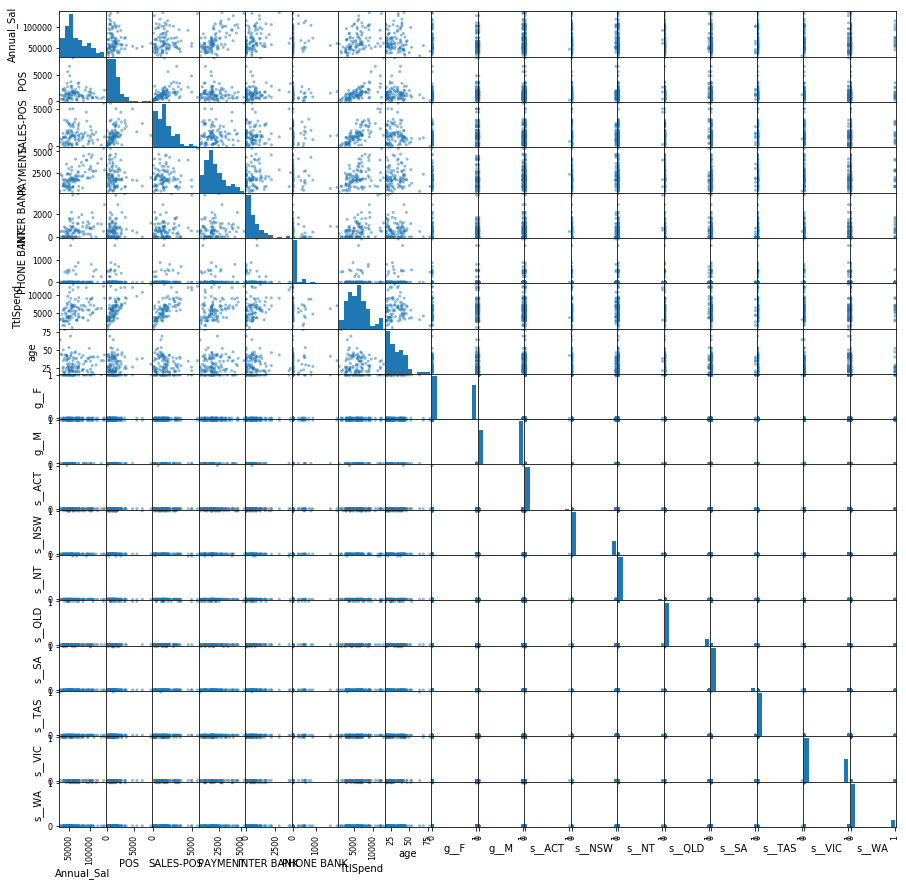

In [285]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_f,figsize=(15, 15))
plt.show()

In [290]:
y = df_f['Annual_Sal']
x = df_f.drop(columns=['Annual_Sal'], axis = 1)

### Plot the Correlaton Matrix

In [287]:
# Create correlation matrix
corr_matrix = df_f.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# corr_matrix.to_csv('corr_matrix.csv')
# upper.to_csv('upper.csv')
print('Features with correlation higher than 80% :', len(to_drop))
to_drop

Features with correlation higher than 80% : 1


['g__M']

In [292]:
x = x.drop(columns=to_drop)
x.shape

(99, 16)

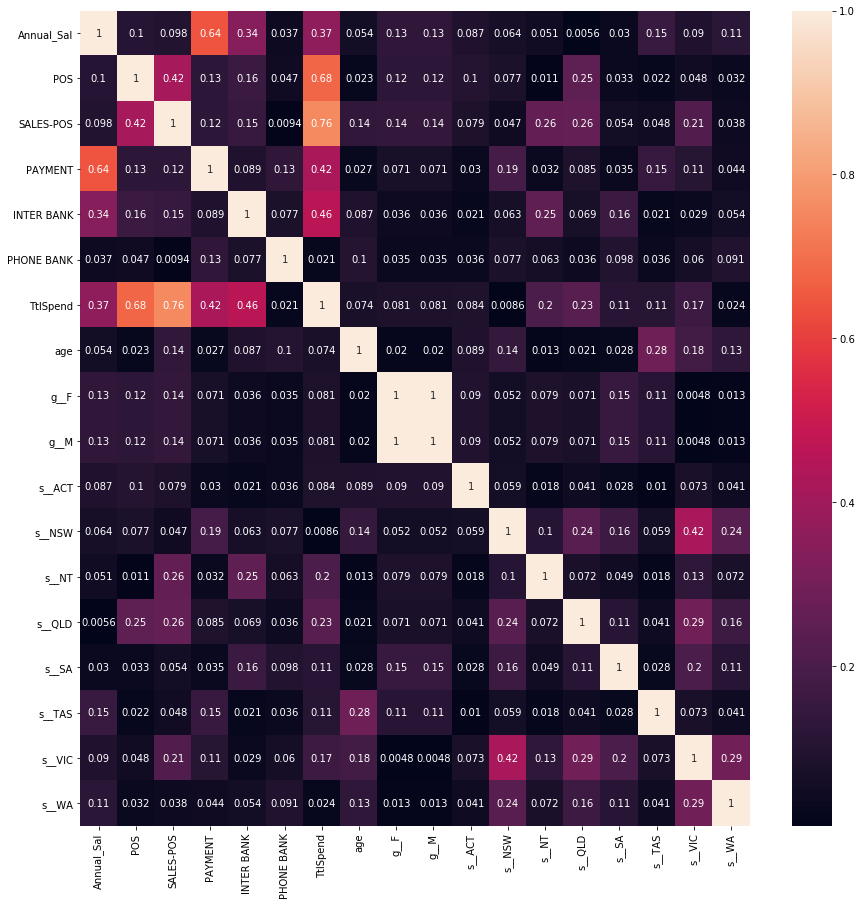

In [296]:
import seaborn as sns

# plot the heatmap

fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(corr_matrix, annot = True,
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns, ax = ax)

<a id='MODELING AND FEATURE SELECTION'></a>
### <font color = blue> 4. MODELING AND FEATURE SELECTION </font>

<a href='#Table of Content'>Back to Top </a> 

In [303]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
                                
def model_summary(model, steps, x, y):
    cv_R2 = cross_val_score(model, x, y, cv=10)
                           
    print('MODEL SUMMARY')
    print('Model use : ', type(model).__name__)
    print('Steps :', steps)
    print('-'*50)
    print('cross_val_scores, R2 are ')
    print(cv_R2[0:5])
    print(cross_val_score(model, x, y, cv=10)[5:10])
    print('cross_val_score, R2 mean     is ',cv_R2.mean())
    print('cross_val_score, R2 variance is ',cv_R2.var())
    print('-'*50)

    MSE = cross_val_score(model, x, y,cv = 10, scoring = 'neg_mean_squared_error')
    RMSE = np.sqrt(-MSE)
    print('RMSE are       ')
    print(RMSE[0:5])
    print(RMSE[5:10])    
    print('RMSE"s mean     is ',RMSE.mean())
    print('RMSE"s variance is ',RMSE.var())  
    print('-'*50)

    return

### Linear Regression

In [310]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

x1, y1 = x, y

steps = [
    ('scalar', StandardScaler()),
    ('model', LinearRegression())
]

model = Pipeline(steps)
model.fit(x1, y1)

model_summary(model,steps,x1,y1)


MODEL SUMMARY
Model use :  Pipeline
Steps : [('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]
--------------------------------------------------
cross_val_scores, R2 are 
[-7.61062323e-01 -6.36846705e+27 -2.58554382e-01  5.89806736e-01
  8.40868912e-02]
[0.38252974 0.37691886 0.31258877 0.53880862 0.46454372]
cross_val_score, R2 mean     is  -6.368467048759352e+26
cross_val_score, R2 variance is  3.650163529602029e+54
--------------------------------------------------
RMSE are       
[2.20988376e+04 2.01259158e+18 2.60304711e+04 1.59359792e+04
 1.44155353e+04]
[22373.9739563  13723.45748247 15234.45437577 17068.85609574
 22334.10831766]
RMSE"s mean     is  2.0125915784812192e+17
RMSE"s variance is  3.6454723755954916e+35
--------------------------------------------------


/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/teikningyang/anaconda3/lib/python3.7/site-packa

### Polynimial 2 Degrees

In [312]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

x1, y1 = x, y
degree = 2
m_name = 'poly'
steps = [
    ('scalar', StandardScaler()),
    (m_name, PolynomialFeatures(degree=degree)),
    ('model', LinearRegression())
]

model = Pipeline(steps)
model.fit(x1, y1)

model_summary(model,steps,x1,y1)


/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/teikningyang/anaconda3/lib/python3.7/site-packa

MODEL SUMMARY
Model use :  Pipeline
Steps : [('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]
--------------------------------------------------
cross_val_scores, R2 are 
[-7.33263431e+18 -4.15580108e+24 -8.09589232e+24 -1.82007756e+01
 -1.24569033e+01]
[ 2.57585163e-02 -2.23741518e+24 -2.15263825e+01 -2.32298494e+01
 -1.12158957e+24]
cross_val_score, R2 mean     is  -1.561070547912322e+24
cross_val_score, R2 variance is  6.470873236703152e+48
--------------------------------------------------
RMSE are       
[4.50933064e+13 5.14121272e+16 6.60204374e+16 1.09029464e+05
 5.52555876e+04]
[2.81040181e+04 2.60054594e+16 8.72096053e+04 1.23719792e+05
 3.23238880e+16]
RMSE"s mean     is  1.7580700522470336e+16
RMSE"s variance is  5.632214350242106e+32
---------------------------------------

/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base

###  LASSO REGRESSION

In [307]:
degree = 2
m_name = 'poly'

reg = LassoCV(eps=0.001, n_alphas=50)
steps = [
    ('scalar', StandardScaler()),
    (m_name, PolynomialFeatures(degree=degree)),
    ('model', reg)
]

model = Pipeline(steps)
model.fit(x, y)

cv_mse_mean = np.mean(reg.mse_path_, axis=0)
cv_rmse_mean = np.sqrt(cv_mse_mean)
cv_mse_var = np.var(reg.mse_path_, axis=0)
Best_Alpha = reg.alpha_
# print("alphas: %s" % alpha)
print("CV RMSE: %s" % cv_rmse_mean)
print("CV MSE VAR %s" % cv_mse_var )
print("Best alpha using built-in LassoCV: %f" % Best_Alpha)

/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small

CV RMSE: [25113.63950506 37984.76473822 28912.07344115]
CV MSE VAR [6.97579676e+16 3.25839073e+18 3.37078760e+17]
Best alpha using built-in LassoCV: 2868.957444


/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceW

In [313]:
degree = 2
m_name = 'poly'
alpha = Best_Alpha
model_N = Lasso(alpha=alpha, fit_intercept=True)
steps = [
    ('scalar', StandardScaler()),
    (m_name, PolynomialFeatures(degree=degree)),
    ('model', model_N)
]

model = Pipeline(steps)
model.fit(x, y)

model_summary(model,steps, x, y)


/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/teikningyang/anaconda3/lib/python3.7/site-packa

MODEL SUMMARY
Model use :  Pipeline
Steps : [('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', Lasso(alpha=2868.9574444580844, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]
--------------------------------------------------
cross_val_scores, R2 are 
[-0.4624155  -0.04977279 -0.62355976  0.51040947  0.09528671]
[0.23429819 0.29330387 0.29272746 0.67790176 0.54800974]
cross_val_score, R2 mean     is  0.1516189161443005
cross_val_score, R2 variance is  0.16313242886462467
--------------------------------------------------
RMSE are       
[20138.05204132 25839.60407031 29565.15599878 17410.08919806
 14327.12738192]
[24915.2323873  14615.29530899 15452.97104676 14264.54743575
 20519.70664332]
RMSE"s mean     is  19704.778151250583
RMSE"s variance is  2

/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/d

### FEATURE SELECTION WITH LASSO

In [318]:
alpha = None
reg = LassoCV(eps=0.001, n_alphas=100,cv=5)
reg.fit(x, y)

cv_mse_mean = np.mean(reg.mse_path_, axis=0)
cv_rmse_mean = np.sqrt(cv_mse_mean)
cv_mse_var = np.var(reg.mse_path_, axis=0)
Best_Alpha = reg.alpha_
print("alphas: %s" % alpha)
print("CV RMSE: %s" % cv_rmse_mean)
print("CV MSE VAR %s" % cv_mse_var )
print("Best alpha using built-in LassoCV: %f" % Best_Alpha)

alphas: None
CV RMSE: [20128.22889369 19389.81750649 20594.73552723 15390.86222071
 19837.09191452]
CV MSE VAR [1.84847724e+15 8.96880506e+15 1.87167300e+15 1.76650717e+15
 3.30979980e+16]
Best alpha using built-in LassoCV: 228368.143182


In [319]:
coef = pd.Series(reg.coef_, index = x.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " 
      +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 11 variables


In [321]:
lasso_L = pd.DataFrame(reg.coef_, index=x.columns)
lasso_List = lasso_L[lasso_L!=0]
lasso_List = lasso_List.dropna(axis=0, how='all')
l_list_top = lasso_List.abs().sort_values(0,ascending=False)[0:20]
# l_list_bot = lasso_List.abs().sort_values(0,ascending=True)[0:20]
print(l_list_top)
print('-'*10)
#print(l_list_bot)

                    0
PAYMENT     13.418750
INTER BANK   9.296358
PHONE BANK   8.200798
POS          1.430636
TtlSpend     0.249085
----------


### Decision Tree Regressor

In [309]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)

model.fit(x, y)

steps = 'no steps'

model_summary(model,steps, x, y)

MODEL SUMMARY
Model use :  DecisionTreeRegressor
Steps : no steps
--------------------------------------------------
cross_val_scores, R2 are 
[-0.4433291   0.30987931 -0.54244282  0.77353984 -1.67579128]
[ 0.13514426 -1.50653145 -0.37435287  0.38894848  0.54047235]
cross_val_score, R2 mean     is  -0.23944632821122216
cross_val_score, R2 variance is  0.629153727228638
--------------------------------------------------
RMSE are       
[20006.20672441 20950.80536877 28817.1197676  11840.78243614
 24639.37874217]
[26479.32692687 27525.0311444  21541.09225643 19647.29384419
 20690.09260223]
RMSE"s mean     is  22213.71298132037
RMSE"s variance is  21932045.10240772
--------------------------------------------------


<a id='MODELING AFTER FEATURE SELECTION'></a>
### <font color = blue> 5. MODELING AFTER FEATURE SELECTION </font>

<a href='#Table of Content'>Back to Top </a> 

In [322]:
X_Final = x[lasso_List.index]
print(X_Final.shape)

(99, 5)


### LINEAR REGRESSION

In [323]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

x1, y1 = X_Final, y

steps = [
    ('scalar', StandardScaler()),
    ('model', LinearRegression())
]

model = Pipeline(steps)
model.fit(x1, y1)

model_summary(model, steps,x1,y1)

MODEL SUMMARY
Model use :  Pipeline
Steps : [('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]
--------------------------------------------------
cross_val_scores, R2 are 
[0.0961465  0.12620884 0.20338617 0.65773651 0.10800842]
[0.37047188 0.31226731 0.42484834 0.65455803 0.56529608]
cross_val_score, R2 mean     is  0.35189280642470094
cross_val_score, R2 variance is  0.043579868030366474
--------------------------------------------------
RMSE are       
[15831.82901468 23574.47451114 20709.51635884 14556.76198691
 14226.03964716]
[22591.37555584 14417.8689642  13935.09018364 14772.4107962
 20123.49399333]
RMSE"s mean     is  17473.886101195796
RMSE"s variance is  13181035.968599224
--------------------------------------------------


### POLYNOMIAL REGRESSION 2nd DEGREES

In [325]:
degree = 2
m_name = 'poly'
alpha = Best_Alpha
model_N = Lasso(alpha=alpha, fit_intercept=True)
steps = [
    ('scalar', StandardScaler()),
    (m_name, PolynomialFeatures(degree=degree)),
    ('model', model_N)
]

model = Pipeline(steps)
model.fit(X_Final, y)

model_summary(model,steps, x, y)



/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base

MODEL SUMMARY
Model use :  Pipeline
Steps : [('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', Lasso(alpha=1068.886407401765, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]
--------------------------------------------------
cross_val_scores, R2 are 
[-1.33133703 -0.12766835 -0.90561916  0.4481784  -0.14982766]
[0.26328038 0.25522634 0.21755278 0.57986144 0.20518435]
cross_val_score, R2 mean     is  -0.05451685116730519
cross_val_score, R2 variance is  0.3362621048446405
--------------------------------------------------
RMSE are       
[25426.38379646 26781.12972091 32030.52751873 18483.48417761
 16151.7659466 ]
[24439.15723134 15003.87346305 16253.47095535 16291.46338738
 27210.70650687]
RMSE"s mean     is  21807.19627043155
RMSE"s variance is  32

/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/teikningyang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/d

### RIDGE REGRESSION

MODEL SUMMARY
Model use :  Pipeline
Steps : [('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', RidgeCV(alphas=array([             1,             10,            100,           1000,
                10000,         100000,        1000000,       10000000,
            100000000,     1000000000,    10000000000,   100000000000,
        1000000000000, 10000000000000]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True))]
--------------------------------------------------
cross_val_scores, R2 are 
[ 0.12064326 -0.03440266  0.28576549  0.67181795  0.0940931 ]
[0.47078768 0.42694577 0.51402113 0.25788234 0.24862989]
cross_val_score, R2 mean     is  0.3056183959741531
cross_val_score, R2 variance is  0.04200286734014723
--------------------------------------------------
RMSE are       
[15615.81354813 25649.74270503 19609.49680326 14254.16889385
 14336.57534645]
[20713.33750007 13161.00637266 12809.355

Text(0, 0.5, 'rmse')

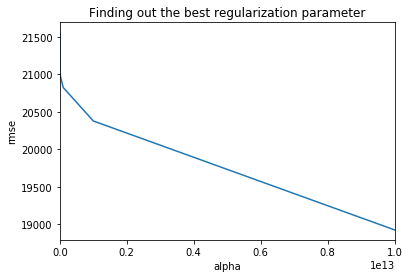

In [335]:
# degree = 2
m_name = 'poly'
alpha = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000,10000000000,100000000000, 1000000000000, 10000000000000]
reg = RidgeCV(alphas=alpha, store_cv_values=True)
steps = [
#    ('scalar', StandardScaler()),
    (m_name, PolynomialFeatures(degree=degree)),
    ('model', reg)
]

model = Pipeline(steps)

x, y  = X_Final, y

#model = reg
model.fit(x, y)

model_summary(model,steps, x, y)

cv_mse_mean = np.mean(reg.cv_values_, axis=0)
cv_rmse_mean = np.sqrt(cv_mse_mean)
cv_mse_var = np.var(reg.cv_values_, axis=0)
Best_Alpha = reg.alpha_
print("alphas: %s" % alpha)
print("CV RMSE: %s" % cv_rmse_mean)
print("CV MSE VAR %s" % cv_mse_var )
print("Best alpha using built-in RidgeCV: %f" % Best_Alpha)

# Plotting the least mean square error on the training data
cv_ridge_train = pd.Series(cv_rmse_mean, index = alpha)
cv_ridge_train.plot(title = "Finding out the best regularization parameter")
plt.xlabel("alpha")
plt.ylabel("rmse")

### DECISION TREE REGRESSOR

In [336]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)

model.fit(X_Final, y)

steps = 'no steps'

model_summary(model,steps, x, y)

MODEL SUMMARY
Model use :  DecisionTreeRegressor
Steps : no steps
--------------------------------------------------
cross_val_scores, R2 are 
[-0.29874703 -0.57845505  0.01989005  0.85674521 -0.24366869]
[ 0.07032819 -0.55164703 -2.6327805  -0.04131862  0.10486363]
cross_val_score, R2 mean     is  -0.3294789849016675
cross_val_score, R2 variance is  0.7385575658979794
--------------------------------------------------
RMSE are       
[18977.73386893 31685.04348585 22971.18685441  9417.57465593
 16797.93853721]
[27453.64024497 21656.47189641 35021.77651262 25648.12621226
 28876.94291106]
RMSE"s mean     is  23850.64351796479
RMSE"s variance is  51503545.61785303
--------------------------------------------------


<a id='SUMMARY'></a>
### <font color = blue> 6. SUMMARY </font>

<a href='#Table of Content'>Back to Top </a> 

None of the attribute can use to explain the Annual Salary

Even Decision Tree (which usually tends to overfit) can not do better. 